Creating a full-fledged recommendation system with a graphical user interface (GUI) involves several steps and components, including data preprocessing, model training, user interaction, and GUI development. Here's a high-level guide to creating a recommendation system using a built-in RBM implementation, Python's Tkinter library for GUI, and a synthetic dataset:



# Step 1: Data Preprocessing

Load your dataset: For this example, let's create a synthetic dataset with user-item interactions and ratings.

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
# Create a synthetic user-item interaction matrix
num_users = 100
num_items = 50

user_item_matrix = np.random.randint(0, 6, size=(num_users, num_items))

data = []
for user_id, ratings in enumerate(user_item_matrix):
    for item_id, rating in enumerate(ratings):
        data.append((user_id, item_id, rating))

data = pd.DataFrame(data, columns=['user', 'item', 'rating'])

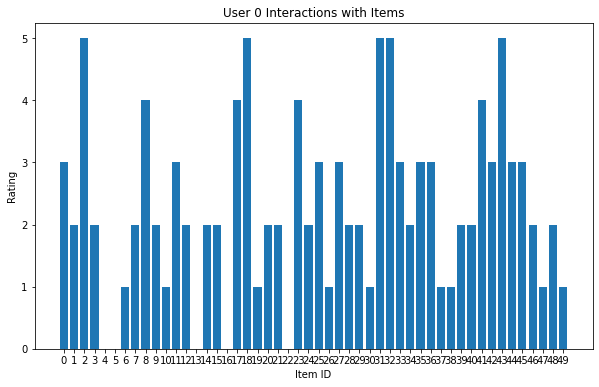

In [3]:
import matplotlib.pyplot as plt
user_0_interactions = data[data['user'] == 0]

# Visualize interactions using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(user_0_interactions['item'], user_0_interactions['rating'])
plt.xlabel('Item ID')
plt.ylabel('Rating')
plt.title('User 0 Interactions with Items')
plt.xticks(range(num_items))
plt.show()

# Step 2: Train the RBM

Use TensorFlow's built-in RBM implementation for training:

In [4]:
# Preprocessing: Convert data to user-item matrix
user_item_matrix = data.pivot(index='user', columns='item', values='rating').fillna(0)
user_item_matrix = user_item_matrix.values.astype(np.float32)

# RBM Implementation using Keras layers
class RBM(tf.keras.layers.Layer):
    def __init__(self, num_hidden, **kwargs):
        super(RBM, self).__init__(**kwargs)
        self.num_hidden = num_hidden

    def build(self, input_shape):
        self.W = self.add_weight(name='W', shape=(input_shape[-1], self.num_hidden), initializer='random_normal', trainable=True)
        self.visible_bias = self.add_weight(name='visible_bias', shape=(input_shape[-1],), initializer='zeros', trainable=True)
        self.hidden_bias = self.add_weight(name='hidden_bias', shape=(self.num_hidden,), initializer='zeros', trainable=True)

    def call(self, inputs):
      inputs_reshaped = tf.expand_dims(inputs, axis=0)  # Reshape input to (1, num_visible)
    
      hidden_prob = tf.nn.sigmoid(tf.matmul(inputs_reshaped, self.W) + self.hidden_bias)
      visible_prob = tf.nn.sigmoid(tf.matmul(hidden_prob, tf.transpose(self.W)) + self.visible_bias)
    
      return hidden_prob, visible_prob


# Create an instance of RBM
rbm = RBM(num_hidden=100)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Example training loop (requires more steps and fine-tuning)
num_epochs = 10
for epoch in range(num_epochs):
    for user_ratings in user_item_matrix:
        with tf.GradientTape() as tape:
            _, reconstructed_ratings = rbm(user_ratings)
            loss = tf.reduce_mean(tf.square(user_ratings - reconstructed_ratings))
        gradients = tape.gradient(loss, rbm.trainable_variables)
        optimizer.apply_gradients(zip(gradients, rbm.trainable_variables))

print("RBM Training Complete!")


RBM Training Complete!


# Step 3: GUI Development

Use Tkinter to create a simple GUI for interaction:

In [11]:
import tkinter as tk

class RecommendationGUI:
    def __init__(self, root, rbm_model, user_item_matrix):
        self.root = root
        self.rbm_model = rbm_model
        self.user_item_matrix = user_item_matrix

        self.label = tk.Label(root, text="Enter User ID:")
        self.label.pack()

        self.user_id_entry = tk.Entry(root)
        self.user_id_entry.pack()

        self.recommend_button = tk.Button(root, text="Get Recommendations", command=self.get_recommendations)
        self.recommend_button.pack()

        self.recommendations_label = tk.Label(root, text="")
        self.recommendations_label.pack()
    def get_recommendations(self):
        user_id = int(self.user_id_entry.get())
        user_ratings = self.user_item_matrix[user_id:user_id+1]

        _, reconstructed_ratings = self.rbm_model(user_ratings)  # Call your RBM's call method

        recommendations = np.argsort(-reconstructed_ratings.numpy())[0]
        recommended_items = ", ".join(map(str, recommendations))
        
        self.recommendations_label.config(text=f"Recommended Items: {recommended_items}")

# Create the Tkinter GUI
root = tk.Tk()
gui = RecommendationGUI(root, rbm, user_item_matrix)
root.mainloop()

# Step 4: Run the GUI Application

Run the Python script with the GUI code. The GUI will allow you to input a user ID and receive recommended items based on the RBM model's predictions.

Please note that this example provides a basic GUI using Tkinter and a simple RBM model. A real-life recommendation system might require more advanced techniques, data preprocessing, evaluation, and deployment considerations. Additionally, creating a more polished GUI might involve using more specialized GUI libraries.

### 